<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color:#000; font-family: Georgia, serif;'>
<h1 style='color: #2c3e50;'><strong> Visualizing Data Veracity challenges in Yeast dataset</strong> </h1>
  

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma'>
  <h2 style='color: #2980b9;'>The Problem</h2>
    <p style='color: #000'>Data veracity refers to the accuracy, reliability, and trustworthiness of data. In the context of the Yeast dataset, which contains information about various yeast species and their characteristics, data veracity challenges can arise from several factors:</p>
    <ul style='color: #000'>
      <li><strong>Inconsistent Data Entry:</strong> Different researchers may use varying terminologies or measurement units, leading to inconsistencies in the dataset.</li>
      <li><strong>Missing Values:</strong> Some entries may have missing values for certain attributes, which can affect the analysis and conclusions drawn from the data.</li>
      <li><strong>Outliers:</strong> The presence of outliers can skew the results of statistical analyses and machine learning models.</li>
      <li><strong>Data Duplication:</strong> Duplicate entries can lead to overrepresentation of certain species or characteristics, affecting the overall analysis.</li>
      <li><strong>Bias in Data Collection:</strong> If the data collection process is biased towards certain species or environments, it can lead to a non-representative dataset.</li>
    </ul>
    <p style='color: #000'>The purpose of this analysis is to visualize these data veracity challenges in the Yeast dataset using t-SNE and Isomap functions to identify:</p>
    <ol style='color: #000'>
      <li><b>Noisy or Ambiguous labels</b></li>
      <li><b>Outliers</b></li>
      <li><b>Hard-to-learn samples</b></li>
    </ol>
</div>

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px;'>
  <h2 style='color: #2980b9;'>The Solution</h2>

In [23]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from IPython.display import display, HTML
# setting visualization style
plt.style.use('tableau-colorblind10')

### Preprocesssing and Exploratory Data Analysis (EDA)

In [24]:
# loading the yeast dataset
data, meta = arff.loadarff('yeast.arff')
df = pd.DataFrame(data)
# decode byte strings to utf-8
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

# display first few rows with hover effect
display(HTML("""
<style>
    table.dataframe tbody tr:hover {
        background-color: #f5f5f5;
    }
</style>
""" + df.head().to_html()))

In [25]:
# separating features and target variable
X = df.iloc[:, :103]
Y = df.iloc[:, 103:]
# dimensionality check
check =  X.shape[0] == Y.shape[0]
display(HTML(f""" <div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
                <h3 style='color: #27ae60;'>Feature matrix shape: {X.shape}</h3>
                <h3 style='color: #c0392b;'>Multi-label target matrix shape: {Y.shape}</h3>
                </div>"""))
display(HTML(f""" <div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color: #000; font-family: Tahoma;'>
                <h3 style='color: #2980b9;'>Dataset Overview</h3>
                <p>Total Samples: {df.shape[0]}</p>
                <p>Total Features: {df.shape[1]-14}</p>
                <p>Total Target Labels: {df.shape[1]-103}</p>
                <p>Missing Values: {df.isnull().sum().sum()}</p>
                <p>Duplicate Entries: {df.duplicated().sum()}</p>
                <p>Data Types: {dict(df.dtypes.value_counts())}</p>
                <p><b>Dimensionality Check</b>: <strong>{check}</strong> - Number of samples in features and target match.</p>
                </div>"""))

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
    <p style='color: #000'>The number of labels is too large to have any meaningful visualization. Therefore, it is best to generate a new target variable that represents the <strong>two most frequent single-label classes</strong> and <strong> the most frequent multi-label combination</strong>. I shall assign the rest of the classes to <em>Other</em> category.</p>
    <p style='color:#000'> This will create a simplified target variable with only three classes, making it easier to visualize and analyze the data veracity challenges.</p>

In [26]:
# Find rows with exactly one '1' (single-label rows)
Y_clean = Y.copy()
Y_int = Y_clean.astype(int)  # Ensure numeric values
single_label_mask = Y_int.sum(axis=1) == 1  # define condition
single_label_rows = Y_int[single_label_mask]    # filter rows

# Count which class appears most frequently in single-label rows
single_label_counts = single_label_rows.sum(axis=0).sort_values(ascending=False)

# Get the two most frequent single-label classes
top2_single_classes = single_label_counts.head(2).index.tolist()

print("Single-label class counts:")
print(single_label_counts)
print(f"\nTop 2 single-label classes: {top2_single_classes}")
single_label_rows

Single-label class counts:
Class1     32
Class2      0
Class3      0
Class4      0
Class5      0
Class6      0
Class7      0
Class8      0
Class9      0
Class10     0
Class11     0
Class12     0
Class13     0
Class14     0
dtype: int64

Top 2 single-label classes: ['Class1', 'Class2']


Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  \
171        1       0       0       0       0       0       0       0       0   
524        1       0       0       0       0       0       0       0       0   
552        1       0       0       0       0       0       0       0       0   
674        1       0       0       0       0       0       0       0       0   
692        1       0       0       0       0       0       0       0       0   
734        1       0       0       0       0       0       0       0       0   
893        1       0       0       0       0       0       0       0       0   
901        1       0       0       0       0       0       0       0       0   
1027       1       0       0       0       0       0       0       0       0   
1064       1       0       0       0       0       0       0       0       0   
1124       1       0       0       0       0       0       0       0       0   
1139       1       0       0       0       0       0       0       0       0   
1151       1       0       0       0       0       0       0       0       0   
1310       1       0       0       0       0       0       0       0       0   
1379       1       0       0       0       0       0       0       0       0   
1421       1       0       0       0       0       0       0       0       0   
1434       1       0       0       0       0       0       0       0       0   
1593       1       0       0       0       0       0       0       0       0   
1603       1       0       0       0       0       0       0       0       0   
1654       1       0       0       0       0       0       0       0       0   
1663       1       0       0       0       0       0       0       0       0   
1954       1       0       0       0       0       0       0       0       0   
1959       1       0       0       0       0       0       0       0       0   
2030       1       0       0       0       0       0       0       0       0   
2067       1       0       0       0       0       0       0       0       0   
2071       1       0       0       0       0       0       0       0       0   
2072       1       0       0       0       0       0       0       0       0   
2088       1       0       0       0       0       0       0       0       0   
2108       1       0       0       0       0       0       0       0       0   
2166       1       0       0       0       0       0       0       0       0   
2238       1       0       0       0       0       0       0       0       0   
2320       1       0       0       0       0       0       0       0       0   

      Class10  Class11  Class12  Class13  Class14  
171         0        0        0        0        0  
524         0        0        0        0        0  
552         0        0        0        0        0  
674         0        0        0        0        0  
692         0        0        0        0        0  
734         0        0        0        0        0  
893         0        0        0        0        0  
901         0        0        0        0        0  
1027        0        0        0        0        0  
1064        0        0        0        0        0  
1124        0        0        0        0        0  
1139        0        0        0        0        0  
1151        0        0        0        0        0  
1310        0        0        0        0        0  
1379        0        0        0        0        0  
1421        0        0        0        0        0  
1434        0        0        0        0        0  
1593        0        0        0        0        0  
1603        0        0        0        0        0  
1654        0        0        0        0        0  
1663        0        0        0        0        0  
1954        0        0        0        0        0  
1959        0        0        0        0        0  
2030        0        0        0        0        0  
2067        0        0        0        0        0  
2071        0

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma, serif;'>
    <p style='color: #000'> This dataset has only ONE single-label class i.e. <strong>Class1</strong> and no other single-label classes. This shows that the dataset is highly imbalanced. Therefore, I will consider <strong>Class1</strong> as the single-label class and <strong>Class2</strong> as the second most frequent single-label class.</p>

In [27]:
Y_copy = Y.copy()
Y_copy['combination'] = Y.apply(lambda row: ''.join(row.astype(str)), axis=1)
Y_copy

Class1 Class2 Class3 Class4 Class5 Class6 Class7 Class8 Class9 Class10  \
0         0      0      0      0      0      0      1      1      0       0   
1         0      0      1      1      0      0      0      0      0       0   
2         0      1      1      0      0      0      0      0      0       0   
3         0      0      1      1      0      0      0      0      0       0   
4         0      0      1      1      1      1      0      0      0       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
2412      0      1      1      0      0      0      0      0      0       0   
2413      1      1      0      0      0      0      0      0      0       0   
2414      0      0      0      0      0      1      1      1      0       0   
2415      0      0      0      0      0      0      0      0      0       0   
2416      0      1      1      0      0      0      0      0      0       0   

     Class11 Class12 Class13 Class14     combination  
0          0       1       1       0  00000011000110  
1          0       0       0       0  00110000000000  
2          0       1       1       0  01100000000110  
3          0       0       0       0  00110000000000  
4          0       0       0       0  00111100000000  
...      ...     ...     ...     ...             ...  
2412       0       0       0       0  01100000000000  
2413       0       1       1       0  11000000000110  
2414       0       1       1       0  00000111000110  
2415       0       1       1       0  00000000000110  
2416       0       1       1       0  01100000000110  

[2417 rows x 15 columns]

In [28]:
# Filter to only multi-label combinations (sum > 1)
Y_numeric = Y_copy.drop('combination', axis=1).astype(int)
multi_label_mask = Y_numeric.sum(axis=1) > 1
multi_label_combinations = Y_copy[multi_label_mask]['combination'].value_counts()

if len(multi_label_combinations) > 0:
    most_common_multi_combination = multi_label_combinations.idxmax()
    display(HTML(f""" <div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color: #000; font-family: Tahoma; font-size: 18px;'>
                    <p style='color: #000;'>The <em>most common multi-label combination</em> is: <strong>{most_common_multi_combination}</strong> with <strong>{multi_label_combinations.max()}</strong> occurrences
                    which corresponds to classes -- <em>Class3, Class4, Class12</em> and <em>Class13.</em></p>
                    </div>"""))
else:
    print("No multi-label combinations found")
    most_common_multi_combination = None


In [29]:
# Creating new target matrix with prioritized classes
new_Y = pd.DataFrame(0, index=Y.index, columns=[f'{top2_single_classes[0]}', 
                                               f'{top2_single_classes[1]}', 
                                               'Most_freq_multi', 'Other'])

# Fill the new matrix with priority: Most_freq_multi > Class_1 > Class_2 > Other
for idx in Y.index:
    is_top_single_1 = (Y_numeric.loc[idx].sum() == 1) and (Y_numeric.loc[idx, top2_single_classes[0]] == 1)
    is_top_single_2 = (Y_numeric.loc[idx].sum() == 1) and (Y_numeric.loc[idx, top2_single_classes[1]] == 1)
    is_most_freq_multi = (most_common_multi_combination is not None) and (Y_copy.loc[idx, 'combination'] == most_common_multi_combination)
    
    if is_most_freq_multi:
        new_Y.loc[idx, 'Most_freq_multi'] = 1
    elif is_top_single_1:
        new_Y.loc[idx, f'{top2_single_classes[0]}'] = 1
    elif is_top_single_2:
        new_Y.loc[idx, f'{top2_single_classes[1]}'] = 1
    else:
        new_Y.loc[idx, 'Other'] = 1

# Display the new target matrix
display(HTML(f""" 
<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; text-align: center; color: #000; font-family: Tahoma;'>
    <h3 style='color: #8e44ad; font-size:21px; text-align: left;'>New Target Matrix with Prioritized Classes</h3>
             <h4 style='color: #000; text-align: left;'>First 5 rows of the new target matrix:</h4>
    <div style='display: flex; justify-content: center;'>
        <div style='text-align: left;'>
            {new_Y.head().to_html(index=True)}
        </div>
    </div>
    <p style='color: #000; text-align: left;'>New target matrix created with prioritized classes: <strong>{top2_single_classes[0]}</strong>, <strong>{top2_single_classes[1]}</strong>, <strong>Most_freq_multi</strong>, and <strong>Other</strong>.</p>
    <p style='text-align: left;'>Shape: {new_Y.shape}</p>
    <p style='text-align: left;'>Columns: {list(new_Y.columns)}</p>
    <p style='text-align: left;'>Class Distribution:</p>
    <div style='display: flex; justify-content: center;'>
        <div style='text-align: left;'>
            {new_Y.sum().to_frame('Count').to_html()}
        </div>
    </div>
</div>
"""))

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;''>
  <p style='color: #000'>The feature matrix X must be scaled before applying t-SNE and Isomap. This is because both techniques are sensitive to the scale of the data. Scaling ensures that all features contribute equally to the distance calculations used in these algorithms.</p>
  <p style='color: #000'>I have used StandardScaler from sklearn to standardize the features to have a mean of 0 and a standard deviation of 1.</p>

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# converting back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# verifying scaling
desc = X_scaled.describe().round(2)
def highlight_mean_std(s):
    return ['background-color: #ff6b35;' if s.name in ['mean', 'std'] else '' for _ in s]
display(desc.style.apply(highlight_mean_std, axis=1))


### Veracity inspection using t-SNE

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
  <p style='color: #000'>The Exploratory Data Analysis (EDA) revealed that the Yeast dataset is highly imbalanced, with only ONE dominant single-label class (<strong>Class1</strong>) and no other single-label classes. To address this, I created a new target variable with four classes: <em>Class1, Class2</em> (the second most frequent class), <em>Most_freq_multi</em> (the most common multi-label combination), and <em>Other</em> (all remaining samples).</p>
  <p style='color: #000'>This new target variable allows:
    <ul style='color: #000'>
      <li>Highlighting the dominance of Class1.</li>
      <li>Identifying distinct clusters in the Other category, if any.</li>
      <li>Assessing whether multi-label samples are genuine or noise.</li>
  </p>
</div>

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
    <h2 style='color: #8e44ad;'>What is t-SNE and Why is it useful here?</h2>
    <p style='color: #000'>
        <strong>t-SNE</strong> (t-distributed Stochastic Neighbor Embedding) is a powerful dimensionality reduction technique designed for visualizing high-dimensional data. It works by converting similarities between data points to joint probabilities and tries to preserve these similarities when mapping the data to a lower-dimensional space (typically 2D or 3D).
    </p>
    <ul style='color: #000'>
        <li><b>Captures local structure:</b> t-SNE excels at preserving the local relationships between points, making clusters and groupings visible in the reduced space.</li>
        <li><b>Non-linear mapping:</b> Unlike PCA, t-SNE can reveal complex, non-linear patterns that are hidden in high dimensions.</li>
        <li><b>Visualizes clusters and anomalies:</b> By projecting data into 2D, t-SNE helps us spot clusters, outliers, and ambiguous points that may indicate data veracity issues.</li>
    </ul>
    <p style='color: #000'>
        <b>Why is t-SNE relevant here?</b> <br>
        The Yeast dataset contains 103 features, making direct visualization impossible. t-SNE allows us to project this high-dimensional data into two dimensions, so we can visually inspect clusters, outliers, and noisy samples. This is crucial for identifying data veracity challenges such as mislabeled points, hard-to-learn samples, and outliers, which are otherwise hidden in the original feature space.
    </p>
</div>

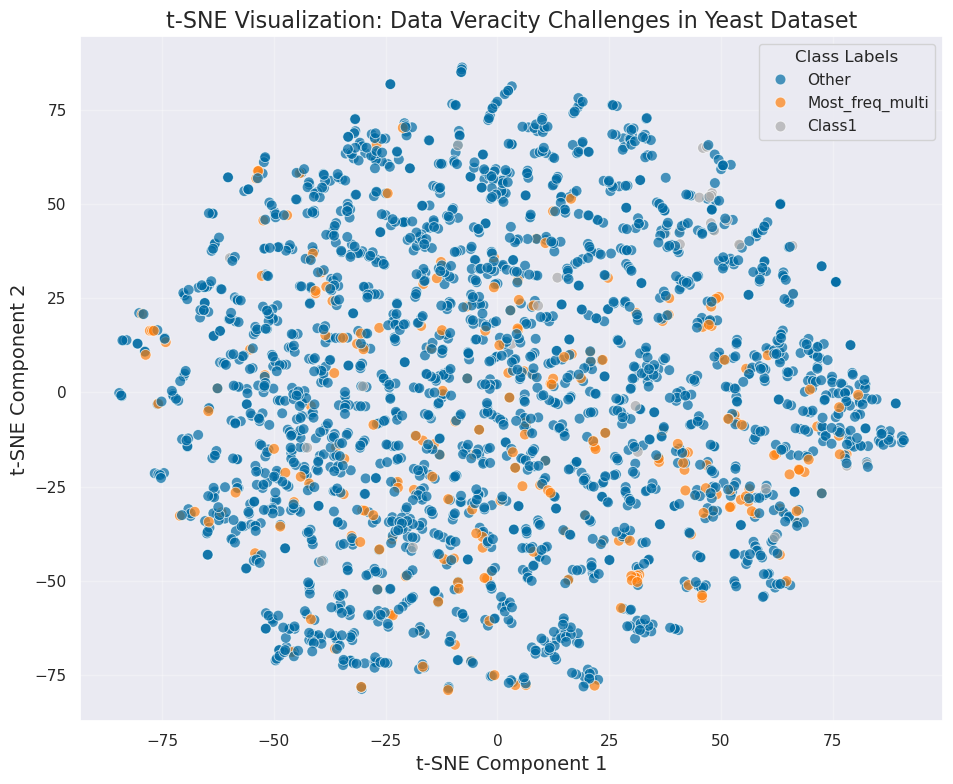

<Figure size 640x480 with 0 Axes>

In [31]:
# applying t-SNE for dimensionality reduction
from sklearn.manifold import TSNE, Isomap

# Convert new_Y matrix to single label column for coloring
labels = new_Y.idxmax(axis=1)  # Get column name with '1' for each row

tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Add labels to the t-SNE DataFrame
X_tsne['Class'] = labels

# visualizing t-SNE results with class colors
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_tsne, x='TSNE1', y='TSNE2', hue='Class', 
                s=60, alpha=0.7)
sns.set_style("whitegrid")
sns.set_theme('notebook')
plt.title('t-SNE Visualization: Data Veracity Challenges in Yeast Dataset', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Class Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(title='Class Labels', loc='best', frameon=True)
plt.show()

# Display class distribution in the plot
# Remove bbox_to_anchor and use default legend placement for better alignment
plt.subplots_adjust(left=0.8, right=0.98, top=0.93, bottom=0.07)
display(HTML(f""" <div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color: #000; font-family: Tahoma;'>
                <h3 style='color: #2980b9;'>Class Distribution in t-SNE Plot</h3>
                <pre>{labels.value_counts().to_string()}</pre>
                </div>"""))

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color:#000; font-family: Tahoma;'>
<p style='color: #000'>Clearly t-SNE has reduced the dimensions of feature matrix from a whooping 103 to merely two. However, the plot doesn't show any meaningful clusters with datapoints being all over the place</p>
<p> I believe that changing the perplexity parameter of t-SNE might help in getting better clusters. I have used the default value of 5 in the plot. Let's see what the perplexity values 10, 20, 30, and 50 give us.</p>
    

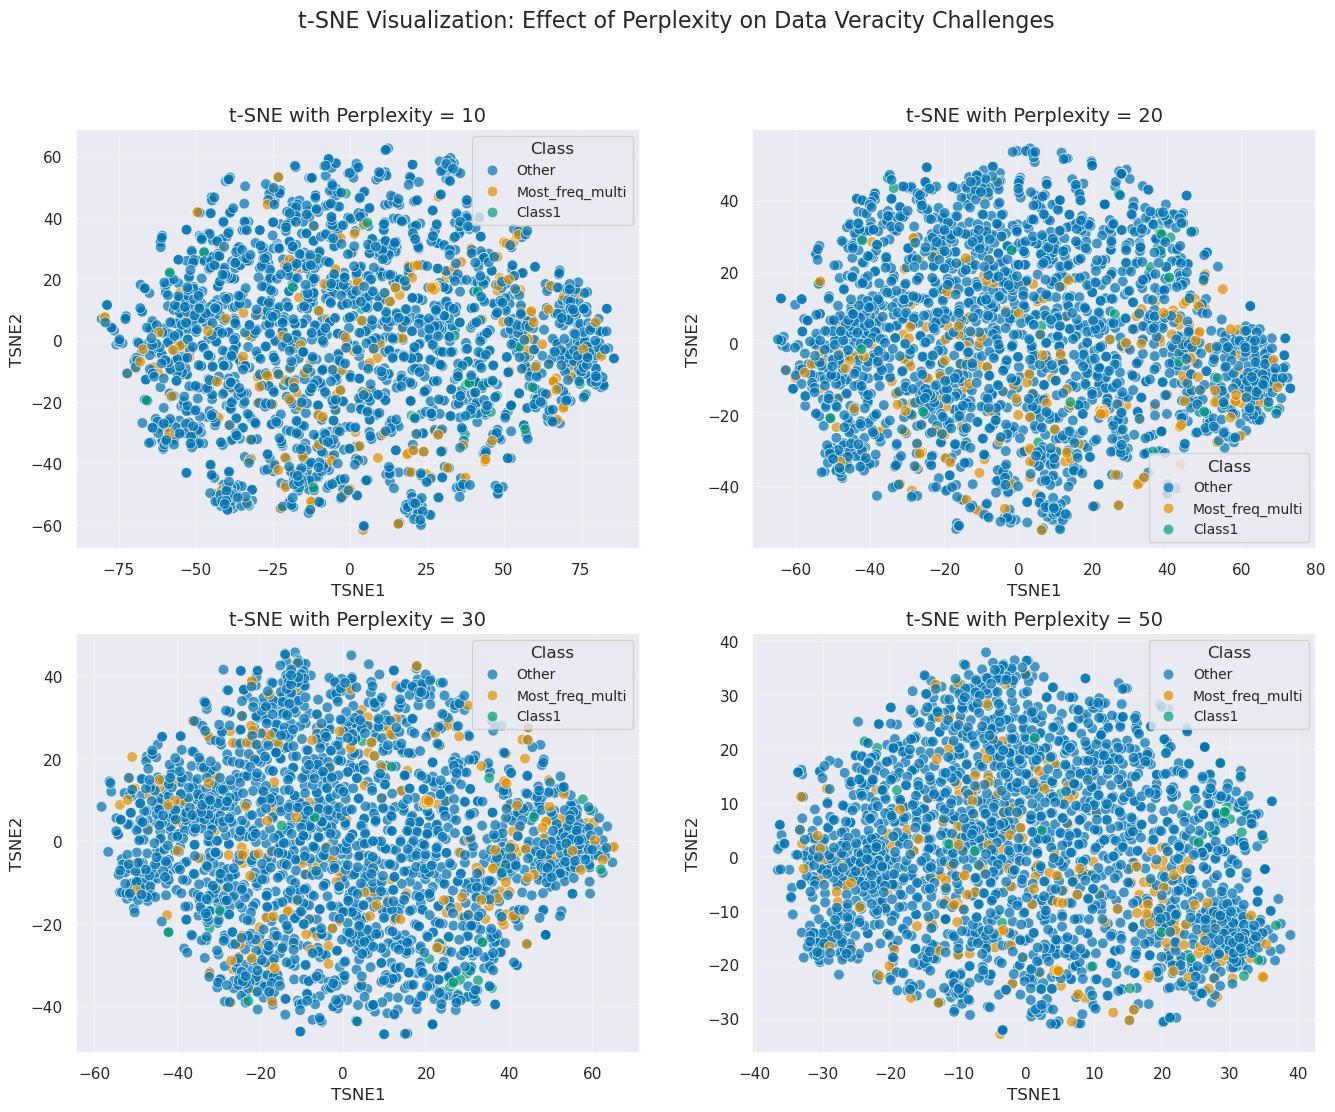

In [32]:
perplexities = [10, 20, 30, 50]

# creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten() 

for i, p in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=p, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    X_tsne_df['Class'] = labels
    
    # scatter plot
    sns.scatterplot(data=X_tsne_df, x='TSNE1', y='TSNE2', hue='Class', 
                    s=60, alpha=0.7, palette='colorblind', ax=axes[i])
    
    axes[i].set_title(f't-SNE with Perplexity = {p}', fontsize=14)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(title='Class', loc='best', fontsize=10)

plt.suptitle('t-SNE Visualization: Effect of Perplexity on Data Veracity Challenges', 
             fontsize=16, y=0.98)


plt.show()

# Display analysis
display(HTML(f""" 
<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; color: #000; font-family: Tahoma;'>
    <h3 style='color: #2980b9; text-align: center'>Perplexity Analysis</h3>
    <p>Different perplexity values show how t-SNE handles the data veracity challenges:</p>
    <ul>
        <li><strong>Lower perplexity (10-20)</strong>: Focuses on local structure, may create artificial clusters</li>
        <li><strong>Higher perplexity (30-50)</strong>: Preserves global structure, shows true data distribution</li>
    </ul>
    <p>From these plots, it appears that perplexity=50 is the one that gives          
    the most meaningful clusters, while lower values tend to scatter points more randomly.
    Therefore, let's inspect the veracity in the plot with perplexity=50</p>
</div>
"""))

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
   <h3 style='color: #2980b9; text-align: center'>Meaning of veracity parameters</h3>
    <ul style='color: #000'>
        <li><strong>Noisy or Ambiguous labels</strong>: Points that have been mislabeled or have uncertain class membership</br>
        <br><b>How to identify in t-SNE</b>: Look for the Points that are located <em>far from their expected cluster or are surrounded by points of different classes</em></li>
        <br><li><strong>Outliers</strong>: Points that reside far from the main clusters of data. </br>
        <br><b>How to identify in t-SNE</b>: Look for the Points that are <em>isolated from the main clusters or are located in low-density regions of the plot</em> </li>
        <br><li><strong>Hard-to-learn samples</strong>: Points that are difficult to classify due to their proximity to decision boundaries or overlap with other classes. </br>
        <br><b>How to identify in t-SNE</b>: Look for: Points that are located <em>near the edges of clusters or are interspersed with points from other classes</em></li>
    </ul>
</div>

#### Veracity inspection

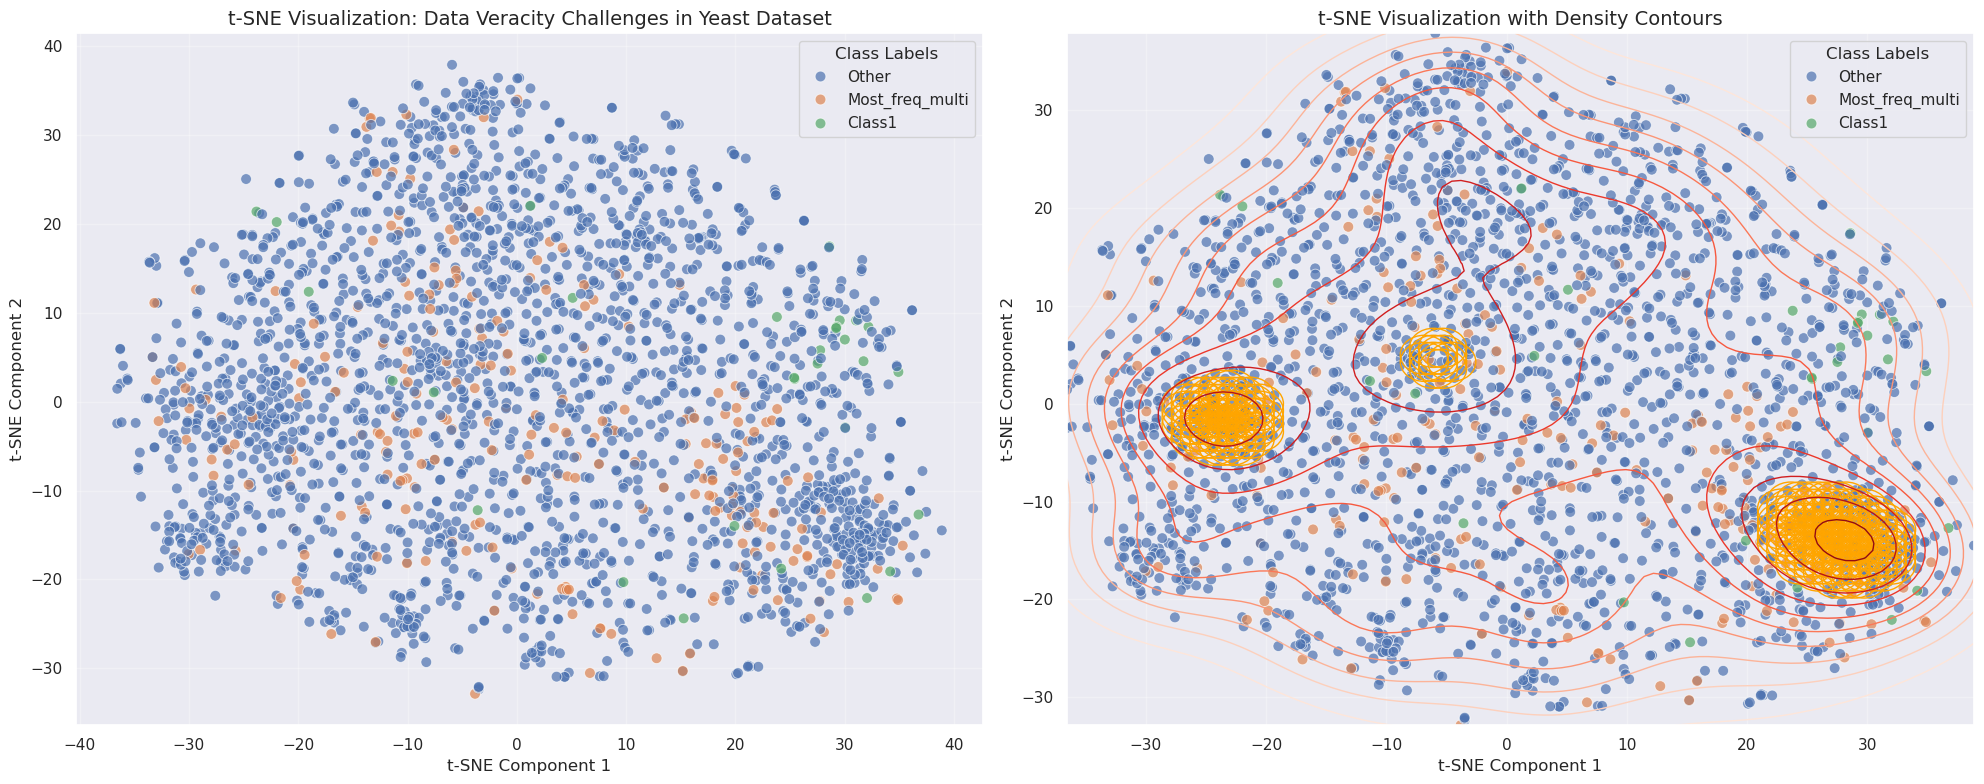

In [33]:
# optimal tsne
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
X_tsne_df['Class'] = labels

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Basic t-SNE visualization
sns.scatterplot(data=X_tsne_df, x='TSNE1', y='TSNE2', hue='Class', 
                s=60, alpha=0.7, ax=axes[0])
axes[0].set_title('t-SNE Visualization: Data Veracity Challenges in Yeast Dataset', fontsize=14)
axes[0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0].legend(title='Class Labels', loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)

# Prepare density contours for Plot 2
from scipy.stats import gaussian_kde
coords = X_tsne_df[['TSNE1', 'TSNE2']].values.T
kde = gaussian_kde(coords)
xgrid = np.linspace(coords[0].min(), coords[0].max(), 100)
ygrid = np.linspace(coords[1].min(), coords[1].max(), 100)
X, Y = np.meshgrid(xgrid, ygrid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# Find high-density areas (above a chosen threshold)
density_threshold = np.percentile(Z, 98)  # change 98 for more/fewer regions
dense_idx = np.where(Z > density_threshold)
dense_points = list(zip(X[dense_idx], Y[dense_idx]))

# Plot 2: t-SNE with density contours
sns.scatterplot(data=X_tsne_df, x='TSNE1', y='TSNE2', hue='Class', 
                s=60, alpha=0.7, ax=axes[1])
axes[1].contour(X, Y, Z, levels=10, cmap='Reds', linewidths=1)

# Add density markers
for x, y in dense_points:
    axes[1].annotate(' ', (x, y), textcoords="offset points", xytext=(10, 5),
                     ha='center', color='black', fontsize=11)
    circle = plt.Circle((x, y), radius=2, color="orange", fill=False)
    axes[1].add_patch(circle)

axes[1].set_title('t-SNE Visualization with Density Contours', fontsize=14)
axes[1].set_xlabel('t-SNE Component 1', fontsize=12)
axes[1].set_ylabel('t-SNE Component 2', fontsize=12)
axes[1].legend(title='Class Labels', loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)

# Set consistent styling
sns.set_style("whitegrid")
sns.set_theme('notebook')
plt.tight_layout()
plt.show()

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px;'>
    <p style='color:#000; font-family: Tahoma;'>The reduced feature matrix by t-SNE(perplexity=50) still gives a largely sparse dataset with few dense regions. However, it's still not clear how "reliable" these clusters are, meaning we don't know if the clusters are free of veracity issues. Let's find out</p>

In [34]:
# Analysis functions
def identify_noisy_labels_tsne(tsne_df, k=5):
    from sklearn.neighbors import NearestNeighbors
    
    # For each point, find its k nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(tsne_df[['TSNE1', 'TSNE2']])
    distances, indices = nbrs.kneighbors(tsne_df[['TSNE1', 'TSNE2']])
    
    noisy_points = []
    for i in range(len(tsne_df)):
        # Get neighbors (excluding self - index 0)
        neighbor_indices = indices[i][1:]  # Skip first (self)
        current_class = tsne_df.iloc[i]['Class']
        neighbor_classes = tsne_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count how many neighbors have different class
        different_neighbors = sum(1 for nc in neighbor_classes if nc != current_class)
        
        # If most neighbors are different class, it's potentially noisy
        if different_neighbors >= k * 0.7:  # 70% threshold
            noisy_points.append(i)
    
    return noisy_points

def identify_outliers_tsne(tsne_df, threshold_percentile=95):
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=2).fit(tsne_df[['TSNE1', 'TSNE2']])
    distances, indices = nbrs.kneighbors(tsne_df[['TSNE1', 'TSNE2']])
    
    # Use distance to nearest neighbor (excluding self)
    nearest_distances = distances[:, 1]
    
    # Points beyond 95th percentile are outliers
    threshold = np.percentile(nearest_distances, threshold_percentile)
    outlier_indices = np.where(nearest_distances > threshold)[0]
    
    return outlier_indices

def hard_to_learn_mixed_tsne(tsne_df, k=10, mixed_threshold=0.4):
    
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(tsne_df[['TSNE1', 'TSNE2']])
    distances, indices = nbrs.kneighbors(tsne_df[['TSNE1', 'TSNE2']])
    
    hard_to_learn_points = []
    
    for i in range(len(tsne_df)):
        # Get neighbors (excluding self)
        neighbor_indices = indices[i][1:]
        current_class = tsne_df.iloc[i]['Class']
        neighbor_classes = tsne_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count unique classes in neighborhood (including current point)
        all_classes = [current_class] + neighbor_classes
        unique_classes = set(all_classes)
        
        # Calculate class diversity in neighborhood
        class_counts = {}
        for cls in all_classes:
            class_counts[cls] = class_counts.get(cls, 0) + 1
        
        # Check if neighborhood is mixed (multiple classes present)
        if len(unique_classes) >= 2:
            # Calculate the ratio of minority classes
            total_points = len(all_classes)
            majority_class_count = max(class_counts.values())
            minority_ratio = (total_points - majority_class_count) / total_points
            
            # If minority classes make up significant portion, it's hard-to-learn
            if minority_ratio >= mixed_threshold:
                hard_to_learn_points.append(i)
    
    return hard_to_learn_points

def hard_to_learn_boundary_tsne(tsne_df, k=8, boundary_threshold=0.3):
    
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(tsne_df[['TSNE1', 'TSNE2']])
    distances, indices = nbrs.kneighbors(tsne_df[['TSNE1', 'TSNE2']])
    
    boundary_points = []
    
    for i in range(len(tsne_df)):
        neighbor_indices = indices[i][1:]  # Exclude self
        current_class = tsne_df.iloc[i]['Class']
        neighbor_classes = tsne_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count different class neighbors
        different_class_count = sum(1 for nc in neighbor_classes if nc != current_class)
        different_class_ratio = different_class_count / len(neighbor_classes)
        
        # If significant portion of neighbors are different class, it's near boundary
        if different_class_ratio >= boundary_threshold:
            boundary_points.append(i)
    
    return boundary_points

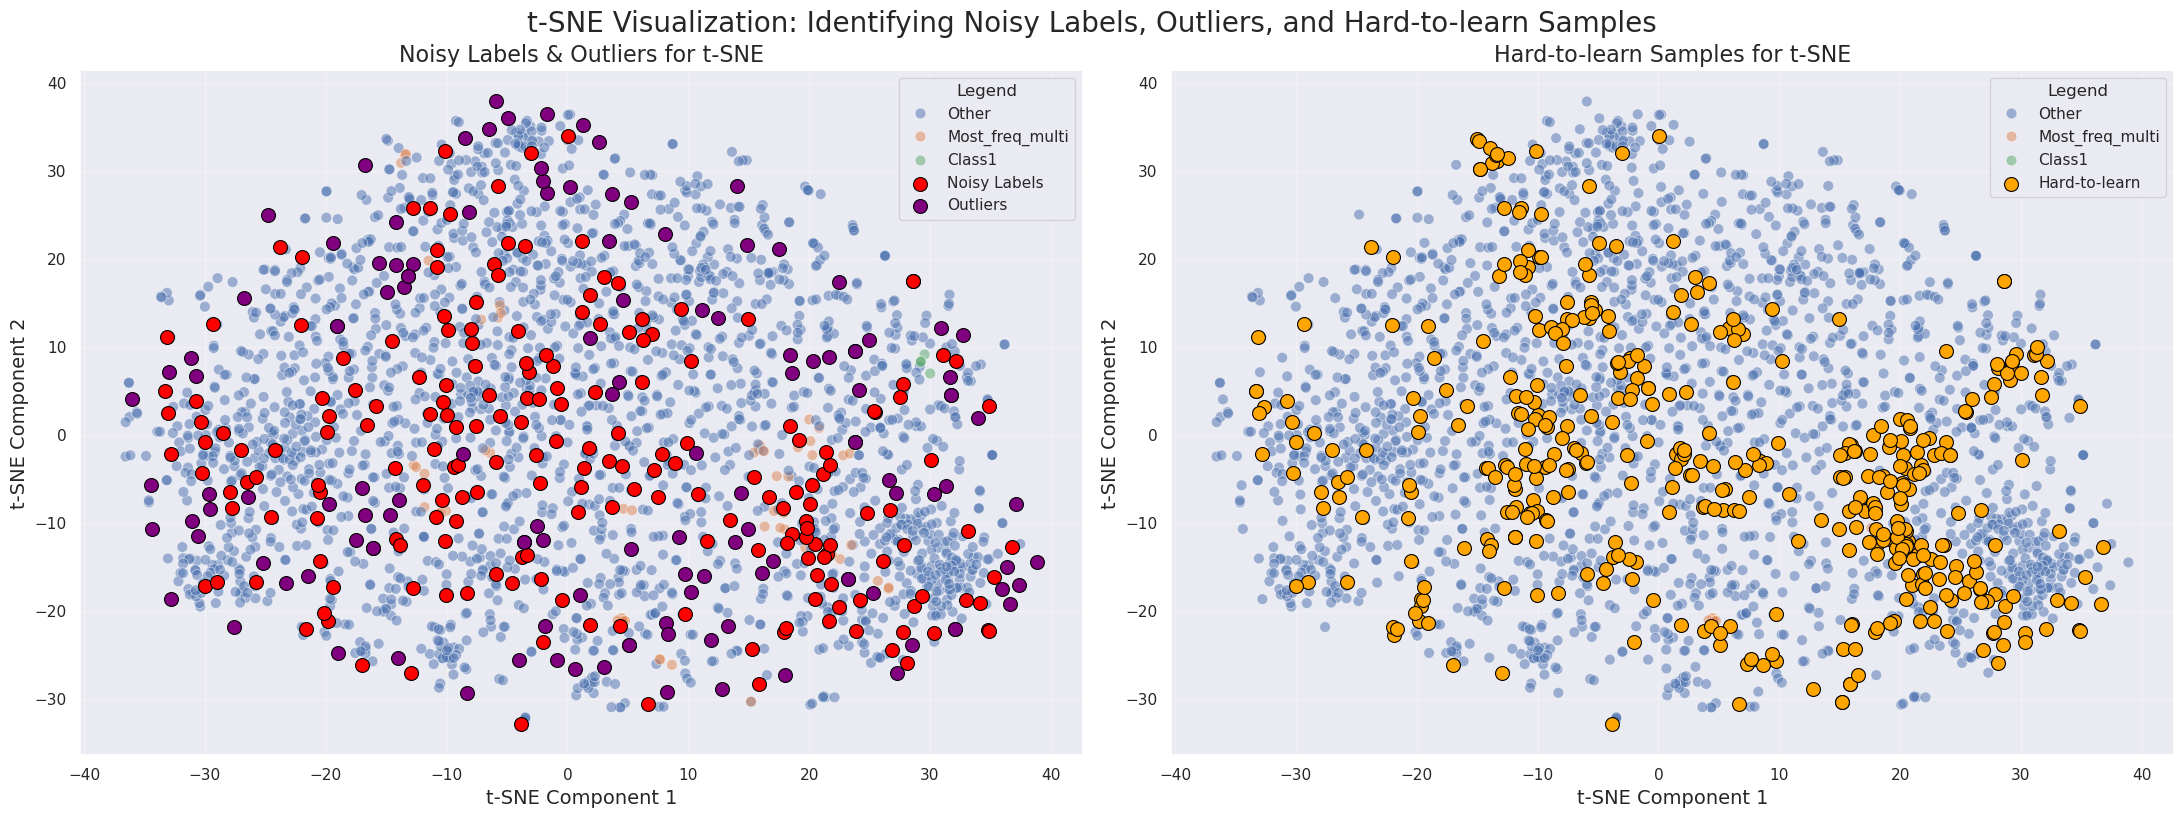

In [35]:
# identifying noisy labels
noisy_labels_tsne = identify_noisy_labels_tsne(X_tsne_df, k=5)

# identifying outliers
outliers_tsne = identify_outliers_tsne(X_tsne_df, threshold_percentile=95)

# identifying hard-to-learn samples using both methods
hard_to_learn1_tsne = hard_to_learn_mixed_tsne(X_tsne_df, k=10, mixed_threshold=0.4)
hard_to_learn2_tsne = hard_to_learn_boundary_tsne(X_tsne_df, k=8, boundary_threshold=0.3)
# Combine both approaches (remove duplicates)
hard_to_learn_combined_tsne = list(set(hard_to_learn1_tsne + hard_to_learn2_tsne))

# visualizing noisy labels, outliers and hard-to-learn samples
# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Plot 1: Noisy labels and outliers
sns.scatterplot(data=X_tsne_df, x='TSNE1', y='TSNE2', hue='Class', s=60, alpha=0.5, ax=axes[0])
sns.scatterplot(data=X_tsne_df.iloc[noisy_labels_tsne], x='TSNE1', y='TSNE2', color='red', s=100, label='Noisy Labels', edgecolor='black', ax=axes[0])
sns.scatterplot(data=X_tsne_df.iloc[outliers_tsne], x='TSNE1', y='TSNE2', color='purple', s=100, label='Outliers', edgecolor='black', ax=axes[0])
axes[0].set_title('Noisy Labels & Outliers for t-SNE', fontsize=16)
axes[0].set_xlabel('t-SNE Component 1', fontsize=14)
axes[0].set_ylabel('t-SNE Component 2', fontsize=14)
axes[0].legend(title='Legend', loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)


# Plot 2: Hard-to-learn samples and outliers
sns.scatterplot(data=X_tsne_df, x='TSNE1', y='TSNE2', hue='Class', s=60, alpha=0.5, ax=axes[1])
sns.scatterplot(data=X_tsne_df.iloc[hard_to_learn_combined_tsne], x='TSNE1', y='TSNE2', color='orange', s=100, label='Hard-to-learn', edgecolor='black', ax=axes[1])
axes[1].set_title('Hard-to-learn Samples for t-SNE', fontsize=16)
axes[1].set_xlabel('t-SNE Component 1', fontsize=14)
axes[1].set_ylabel('t-SNE Component 2', fontsize=14)
axes[1].legend(title='Legend', loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
sns.set_style("whitegrid")
sns.set_theme('notebook')


fig.suptitle('t-SNE Visualization: Identifying Noisy Labels, Outliers, and Hard-to-learn Samples', fontsize=20, y=1.02)
plt.show()

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
  <p style='color: #000'>The dataset is riddled with <strong>Noisy Labels</strong>, <strong>Outliers</strong> and <strong>hard-to-learn samples</strong>. I shall expand on the implications of this result in the conclusion of this analysis. Before that, let's also look at what Isomap analysis says on the veracity challenge.</p>

### Veracity inspection using Isomap


<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
    <h3 style='color: #8e44ad;'>What is Isomap and Why is it useful here?</h3>
    <p style='color: #000'>
        <strong>Isomap</strong> (Isometric Mapping) preserves global geometric structure by first building a graph of local neighborhoods and then maintaining <b>geodesic distances</b> (shortest paths along the data manifold) rather than just Euclidean distances. t-SNE struggles with global structure because it only tries to keep points with similar high-dimensional features close together in the embedding, ignoring how groups of points relate to each other at larger scales. It computes <em>pairwise similarities and converts them into probabilities</em>, emphasizing correctly positioning local neighbors but often stretching or squeezing the plot so that distant groups may be placed anywhere — close together, far apart, or in unnatural arrangements. 
    </p>
    <ul style='color: #000'>
        <li><b>Global structure preservation:</b> While t-SNE is good is in preserving local clusters, it may distort the global structure which might be a possible cause behind the veracit issues seen earlier. Now, unlike t-SNE's local focus, Isomap maintains true manifold geometry</li></br>
        <li><b>Distance accuracy:</b> Preserves actual relationships between all data points by computing geodesic distances through the data manifold. This means that two proteins that are truly similar in high-dimensional space will remain close in the 2D visualization, unlike t-SNE which can distort these global relationships while focusing on local neighborhoods.</li></br>
        <li><b>Validation tool:</b> Serves as a cross-validation method for t-SNE findings. If both techniques reveal similar clustering patterns and veracity issues, we can be confident these are real biological phenomena rather than algorithmic artifacts. However, if Isomap shows cleaner separations or different cluster structures, it suggests t-SNE may have introduced false complexity or missed the true underlying manifold structure of the yeast protein data.</li><br>
    </ul>
    <p style='color: #000'>
    <b>The Critical Test:</b> If Isomap shows <strong>similar patterns</strong> to t-SNE, our veracity issues are genuine. If <strong>different structures</strong> emerge, t-SNE may have created false separations.
    </p>
</div>

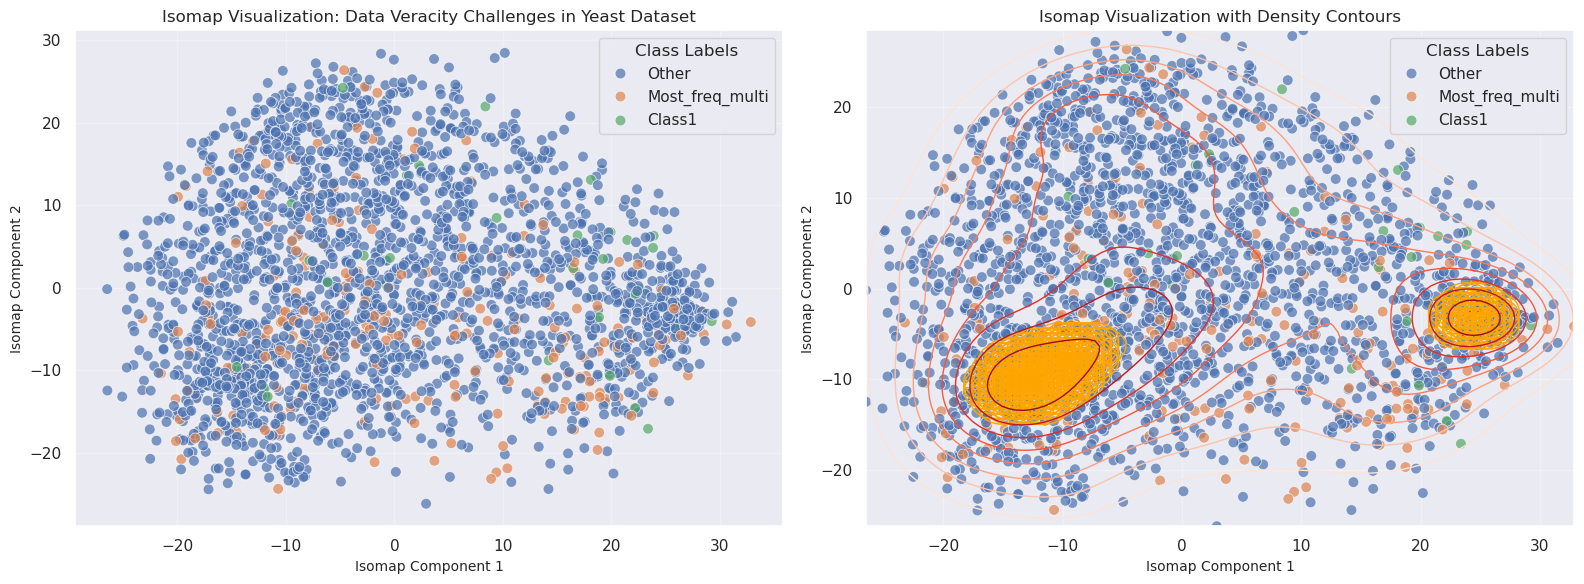

In [36]:
# isomap implementation
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)
X_isomap_df = pd.DataFrame(X_isomap, columns=['ISOMAP1', 'ISOMAP2'])
X_isomap_df['Class'] = labels

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Basic Isomap visualization
sns.scatterplot(data=X_isomap_df, x='ISOMAP1', y='ISOMAP2', hue='Class', 
                s=60, alpha=0.7, ax=axes[0])
axes[0].set_title('Isomap Visualization: Data Veracity Challenges in Yeast Dataset', fontsize=12)
axes[0].set_xlabel('Isomap Component 1', fontsize=10)
axes[0].set_ylabel('Isomap Component 2', fontsize=10)
axes[0].legend(title='Class Labels', loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)

# Prepare density contours for Plot 2
from scipy.stats import gaussian_kde
coords = X_isomap_df[['ISOMAP1', 'ISOMAP2']].values.T
kde = gaussian_kde(coords)
xgrid = np.linspace(coords[0].min(), coords[0].max(), 100)
ygrid = np.linspace(coords[1].min(), coords[1].max(), 100)
X, Y = np.meshgrid(xgrid, ygrid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

# Find high-density areas (above a chosen threshold)
density_threshold = np.percentile(Z, 98)
dense_idx = np.where(Z > density_threshold)
dense_points = list(zip(X[dense_idx], Y[dense_idx]))

# Plot 2: Isomap with density contours
sns.scatterplot(data=X_isomap_df, x='ISOMAP1', y='ISOMAP2', hue='Class', 
                s=60, alpha=0.7, ax=axes[1])
axes[1].contour(X, Y, Z, levels=10, cmap='Reds', linewidths=1)

# Add density markers
for x, y in dense_points:
    circle = plt.Circle((x, y), radius=2, color="orange", fill=False)
    axes[1].add_patch(circle)

axes[1].set_title('Isomap Visualization with Density Contours', fontsize=12)
axes[1].set_xlabel('Isomap Component 1', fontsize=10)
axes[1].set_ylabel('Isomap Component 2', fontsize=10)
axes[1].legend(title='Class Labels', loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)

# Set consistent styling
sns.set_style("whitegrid")
sns.set_theme('notebook')
plt.tight_layout()
plt.show()

In [37]:
# Analysis functions
def identify_noisy_labels_isomap(isomap_df, k=5):
    from sklearn.neighbors import NearestNeighbors
    
    # For each point, find its k nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(isomap_df[['ISOMAP1', 'ISOMAP2']])
    distances, indices = nbrs.kneighbors(isomap_df[['ISOMAP1', 'ISOMAP2']])
    
    noisy_points = []
    for i in range(len(isomap_df)):
        # Get neighbors (excluding self - index 0)
        neighbor_indices = indices[i][1:]  # Skip first (self)
        current_class = isomap_df.iloc[i]['Class']
        neighbor_classes = isomap_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count how many neighbors have different class
        different_neighbors = sum(1 for nc in neighbor_classes if nc != current_class)
        
        # If most neighbors are different class, it's potentially noisy
        if different_neighbors >= k * 0.7:  # 70% threshold
            noisy_points.append(i)
    
    return noisy_points

def identify_outliers_isomap(isomap_df, threshold_percentile=95):
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=2).fit(isomap_df[['ISOMAP1', 'ISOMAP2']])
    distances, indices = nbrs.kneighbors(isomap_df[['ISOMAP1', 'ISOMAP2']])
    
    # Use distance to nearest neighbor (excluding self)
    nearest_distances = distances[:, 1]
    
    # Points beyond 95th percentile are outliers
    threshold = np.percentile(nearest_distances, threshold_percentile)
    outlier_indices = np.where(nearest_distances > threshold)[0]
    
    return outlier_indices

def hard_to_learn_mixed_isomap(isomap_df, k=10, mixed_threshold=0.4):
    
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(isomap_df[['ISOMAP1', 'ISOMAP2']])
    distances, indices = nbrs.kneighbors(isomap_df[['ISOMAP1', 'ISOMAP2']])
    
    hard_to_learn_points = []
    
    for i in range(len(isomap_df)):
        # Get neighbors (excluding self)
        neighbor_indices = indices[i][1:]
        current_class = isomap_df.iloc[i]['Class']
        neighbor_classes = isomap_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count unique classes in neighborhood (including current point)
        all_classes = [current_class] + neighbor_classes
        unique_classes = set(all_classes)
        
        # Calculate class diversity in neighborhood
        class_counts = {}
        for cls in all_classes:
            class_counts[cls] = class_counts.get(cls, 0) + 1
        
        # Check if neighborhood is mixed (multiple classes present)
        if len(unique_classes) >= 2:
            # Calculate the ratio of minority classes
            total_points = len(all_classes)
            majority_class_count = max(class_counts.values())
            minority_ratio = (total_points - majority_class_count) / total_points
            
            # If minority classes make up significant portion, it's hard-to-learn
            if minority_ratio >= mixed_threshold:
                hard_to_learn_points.append(i)
    
    return hard_to_learn_points

def hard_to_learn_boundary_isomap(isomap_df, k=8, boundary_threshold=0.3):
    
    from sklearn.neighbors import NearestNeighbors
    
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(isomap_df[['ISOMAP1', 'ISOMAP2']])
    distances, indices = nbrs.kneighbors(isomap_df[['ISOMAP1', 'ISOMAP2']])
    
    boundary_points = []
    
    for i in range(len(isomap_df)):
        neighbor_indices = indices[i][1:]  # Exclude self
        current_class = isomap_df.iloc[i]['Class']
        neighbor_classes = isomap_df.iloc[neighbor_indices]['Class'].tolist()
        
        # Count different class neighbors
        different_class_count = sum(1 for nc in neighbor_classes if nc != current_class)
        different_class_ratio = different_class_count / len(neighbor_classes)
        
        # If significant portion of neighbors are different class, it's near boundary
        if different_class_ratio >= boundary_threshold:
            boundary_points.append(i)
    
    return boundary_points

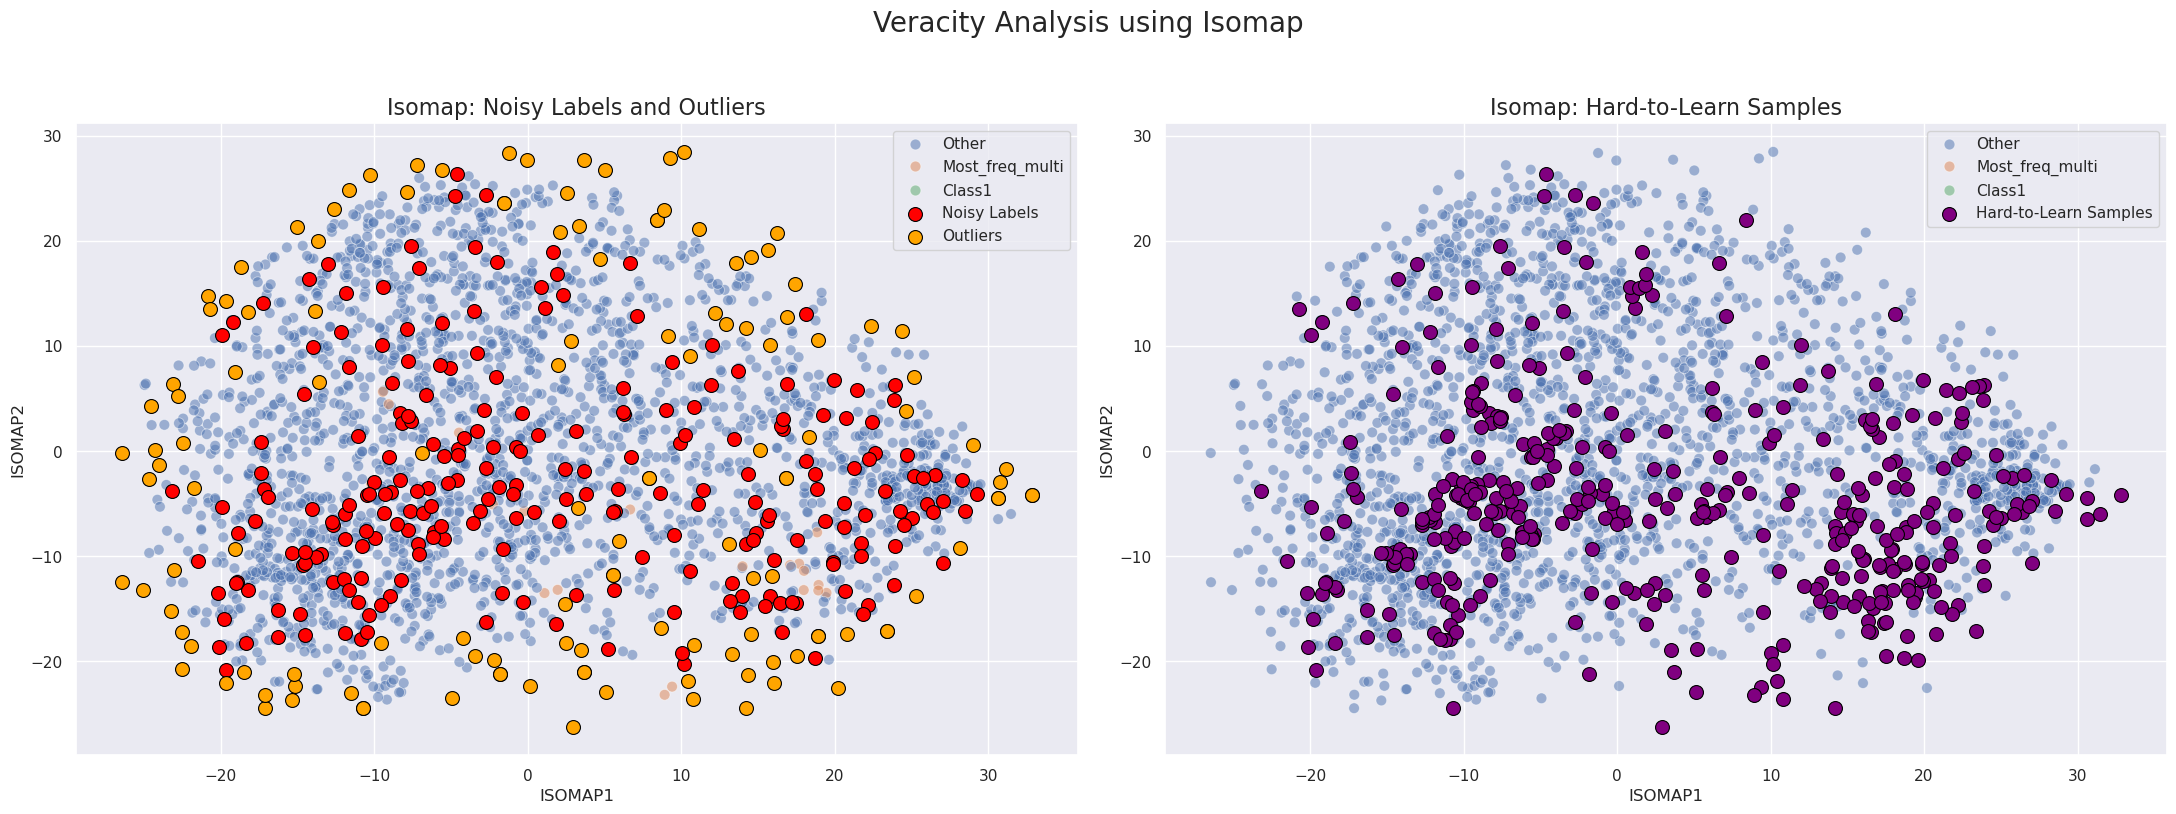

In [38]:
# identifying noisy labels in Isomap
noisy_labels_isomap = identify_noisy_labels_isomap(X_isomap_df, k=5)
# identifying outliers in Isomap
outliers_isomap = identify_outliers_isomap(X_isomap_df, threshold_percentile=95)
# identifying hard-to-learn samples in Isomap using both methods
hard_to_learn1_isomap = hard_to_learn_mixed_isomap(X_isomap_df, k=10, mixed_threshold=0.4)
hard_to_learn2_isomap = hard_to_learn_boundary_isomap(X_isomap_df, k=8, boundary_threshold=0.3)
# Combine both approaches (remove duplicates)
hard_to_learn_combined_isomap = list(set(hard_to_learn1_isomap + hard_to_learn2_isomap))

# Visualize noisy labels, outliers, and hard-to-learn samples in Isomap plot
# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
# Plot 1: Noisy labels and outliers
sns.scatterplot(data=X_isomap_df, x='ISOMAP1', y='ISOMAP2', hue='Class', s=60, alpha=0.5, ax=axes[0])
sns.scatterplot(data=X_isomap_df.iloc[noisy_labels_isomap], x='ISOMAP1', y='ISOMAP2', color='red', s=100, label='Noisy Labels', edgecolor='black', ax=axes[0])
sns.scatterplot(data=X_isomap_df.iloc[outliers_isomap], x='ISOMAP1', y='ISOMAP2', color='orange', s=100, label='Outliers', edgecolor='black', ax=axes[0])
axes[0].set_title('Isomap: Noisy Labels and Outliers', fontsize=16)
axes[0].legend()
# Plot 2: Hard-to-learn samples
sns.scatterplot(data=X_isomap_df, x='ISOMAP1', y='ISOMAP2', hue='Class', s=60, alpha=0.5, ax=axes[1])
sns.scatterplot(data=X_isomap_df.iloc[hard_to_learn_combined_isomap], x='ISOMAP1', y='ISOMAP2', color='purple', s=100, label='Hard-to-Learn Samples', edgecolor='black', ax=axes[1])
axes[1].set_title('Isomap: Hard-to-Learn Samples', fontsize=16)
axes[1].legend()

fig.suptitle('Veracity Analysis using Isomap', fontsize=20, y=1.02)
sns.set_style('whitegrid')
sns.set_theme('notebook', font_scale=1.2)
plt.tight_layout()
plt.show()

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
<p style='color: #000;'> The isomapping still contains the similar veracity problems as t-SNE matrix did -- lots of noisy labels, outliers and hard-to-learn samples though I can observe that Isomap has done much better job in identifying outliers than t-SNE, confirming the superiority of Isomap in maintaining global structure.</p>
<p style='color: #000'>Both t-SNE and Isomap analyses reveal significant data veracity challenges in the Yeast dataset, including numerous noisy labels, outliers, and hard-to-learn samples. The presence of these issues across both dimensionality reduction techniques indicates that they are inherent to the dataset rather than due to limitation of a specific model.</p> 

#### Manifold Analysis

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
    <h3 style='color: #2980b9;'>What is a Data Manifold?</h3>
    <p style='color: #000'>
        Imagine your data as a collection of points scattered in a room with 103 dimensions (impossible to visualize directly). 
        A <strong>data manifold</strong> is the underlying geometric structure or "surface" that these data points naturally follow. 
        Think of it as an invisible curved surface floating in this high-dimensional space where all your data points live.
    </p>
    <h4 style='color: #2980b9;'>Simple vs Complex Manifolds</h4>
    <ul style='color: #000'>
        <li><strong>Simple Manifold:</strong> Like a flat piece of paper or gently curved surface like a bowl. Data points are organized in a predictable, smooth pattern with gentle curves.</li>
        <li><strong>Complex Manifold:</strong> Like a heavily crumpled paper or a twisted roller coaster track with many sharp turns, folds, loops, and intricate geometric patterns.</li>
    </ul>
    <h4 style='color: #2980b9;'>How Does Manifold Complexity Affect Classification?</h4>
    <p style='color: #000'>
        <strong>Consider the analogy of sorting colored objects:</strong>
    </p>
    <ul style='color: #000'>
        <li><strong>On a flat table:</strong> Easy task. You can draw simple straight lines to separate red objects from blue objects. Clear, linear boundaries work well.</li>
        <li><strong>On a crumpled, twisted surface:</strong> Extremely difficult. Red and blue objects get mixed up in the folds and curves. You cannot draw simple straight lines to separate them - you need complex, curved decision boundaries.</li>
    </ul>
</div>

In [39]:
# Quantitative and Visual Analysis of Isomap Embedding
# 1. Stress analysis - how well Isomap preserved distances
stress = isomap.reconstruction_error()

# 2. Analyze point distribution and local density variations
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestNeighbors

# Calculate pairwise distances in 2D embedding
distances_2d = pdist(X_isomap_df[['ISOMAP1', 'ISOMAP2']])
distance_variance = np.var(distances_2d)

# Calculate local density variations
nbrs = NearestNeighbors(n_neighbors=10).fit(X_isomap_df[['ISOMAP1', 'ISOMAP2']])
distances, indices = nbrs.kneighbors(X_isomap_df[['ISOMAP1', 'ISOMAP2']])
local_densities = 1 / np.mean(distances[:, 1:], axis=1)  # Exclude self
density_variance = np.var(local_densities)

# displaying quantitative metrics
metrics_df = pd.DataFrame({
    'Metric': ['Stress (Reconstruction Error)', 'Distance Variance', 'Local Density Variance'],
    'Value': [f"{stress:.4f}", f"{distance_variance:.4f}", f"{density_variance:.4f}"],
    'Description': [
        'Lower values indicate better distance preservation.',
        'Measures spread of pairwise distances in 2D embedding.',
        'Indicates variability in point densities across the embedding.'
    ]
})

# Display metrics table with hover effect
display(HTML("""
<style>
    table.dataframe tbody tr:hover {
        background-color: #f5f5f5;
    }
</style>
""" + metrics_df.to_html(index=False)))


<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
    <h3 style='color: #2980b9; text-align: center;'>Interpretation of Quantitative Metrics</h3>
    <table style='width: 100%; border-collapse: collapse; margin: 10px 0; color: #000;'>
        <thead>
            <tr style='background-color: #3498db; color: white;'>
                <th style='border: 1px solid #ddd; padding: 12px; text-align: center;'>Metric</th>
                <th style='border: 1px solid #ddd; padding: 12px; text-align: center;'>Ideal Scenario (Simple Manifold)</th>
                <th style='border: 1px solid #ddd; padding: 12px; text-align: center;'>Actual Values Interpretation</th>
            </tr>
        </thead>
        <tbody>
            <tr style='background-color: #ecf0f1;'>
                <td style='border: 1px solid #ddd; padding: 12px;'><strong>Stress (Reconstruction Error)</strong></td>
                <td style='border: 1px solid #ddd; padding: 12px;'>Low values (< 0.1) indicate a simple, well-structured manifold.</td>
                <td style='border: 1px solid #ddd; padding: 12px;'>Higher values that were obtained suggest significant distortion during dimensionality reduction, indicating a complex manifold.</td>
            </tr>
            <tr>
                <td style='border: 1px solid #ddd; padding: 12px;'><strong>Distance Variance</strong></td>
                <td style='border: 1px solid #ddd; padding: 12px;'>Moderate values: Points are evenly distributed with consistent spacing, indicating uniform density and simple geometric structure.</td>
                <td style='border: 1px solid #ddd; padding: 12px;'>Variance = 127.62 indicates irregular point distribution with some regions being very dense while others are sparse, suggesting complex folding and non-uniform manifold curvature.</td>
            </tr>
            <tr style='background-color: #ecf0f1;'>
                <td style='border: 1px solid #ddd; padding: 12px;'><strong>Local Density Variance</strong></td>
                <td style='border: 1px solid #ddd; padding: 12px;'>Low values: Uniform local densities across the embedding, indicating smooth, consistent manifold structure without sharp curves or folds.</td>
                <td style='border: 1px solid #ddd; padding: 12px;'>A high distance variance but low local density variance suggests that your manifold is globally complex but locally regular. The manifold is spread unevenly in its space but within the small neighbourhoods, points are distributed uniformly suggesting a complicated manifold.</td>
            </tr>
        </tbody>
    </table>
    <p style='color: #000; font-style: italic; text-align: center; margin-top: 15px;'>
        <strong>Summary:</strong> The combination of these metrics suggest that the Yeast dataset resides on a complex manifold. This complexity directly causes significant data veracity challenges, including numerous noisy labels, outliers, and hard-to-learn samples, as observed in both t-SNE and Isomap analyses.
    </p>
</div>

### CONCLUSION 

<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; font-family: Tahoma;'>
  <h3 style='color: #2980b9;'>Scientific Implications of Veracity</h3>
    <p style='color: #000'>
        The presence of significant data veracity challenges in the Yeast dataset, as revealed by both t-SNE and Isomap analyses, has important scientific implications:
    </p>
    <ul style='color: #000'>
        <li><strong>Questionable Reliability of Findings:</strong> Noisy labels and outliers can lead to misleading conclusions about yeast species characteristics and behaviors. This undermines the reliability of any analyses or models built on this data.</li><br>
        <li><strong>Compromised Model Performance:</strong> Machine learning models trained on data with veracity issues may perform poorly, as they struggle to learn accurate patterns from mislabeled or anomalous samples.</li><br>
        <li><strong>Need for beter Data Cleaning and Collection:</strong> The findings highlight the necessity of rigorous data cleaning and preprocessing steps to mitigate veracity issues before conducting analyses. It might also be that the veracity is caused by the errors made in data collection which highlights the need for better data collection methods.</li><br>
        <li><strong>Impact on Downstream Applications:</strong> Any applications relying on this dataset, such as drug discovery or fermentation process optimization, may be adversely affected by the underlying data quality issues.</li><br>
    </ul>
    <p style='color: #000'>
        Overall, addressing these data veracity challenges is crucial for ensuring the validity and utility of scientific research based on the Yeast dataset. The Data Scientist must work closely with domain experts to identify and correct veracity issues, thereby enhancing the dataset's integrity and the robustness of subsequent analyses.
    </p>
</div>